# Machine Learning

## What is Machine Learning?
**Machine learning** is the science (and art) of programming computers so they can learn from data.

 For example your spam filter is a machine learning program that, given examples of spam emails (flagged by users) and examples of regular emails (non-spam), can learn to flag spam. The examples that the system uses to learn are called the training set. Each training example is called a training instance (or sample). The part of a machine learning system that learns and makes predictions is called a model. Neural networks and random forests are examples of models.

## Why use ML?
Consider how you would write a spam filter using traditional programming techniques:
1. First you would examine what spam typically looks like. You might notice that some words or phrases (such as “4U”, “credit card”, “free”, and “amazing”) tend to come up a lot in the subject line. Perhaps you would also notice a few other patterns in the sender’s name, the email’s body, and other parts of the email.
2. You would write a detection algorithm for each of the patterns that you noticed, and your program would flag emails as spam if a number of these patterns were detected.
3. You would test your program and repeat steps 1 and 2 until it was good enough to launch.

Since the problem is difficult, your program will likely become a long list of complex rules pretty hard to maintain.
In contrast, a spam filter based on machine learning techniques automatically learns which words and phrases are good predictors of spam by detecting unusually frequent patterns of words in the spam examples compared to the ham examples. The program is much shorter, easier to maintain, and most likely more accurate.

What if spammers notice that all their emails containing “4U” are blocked? They might start writing “For U” instead. A spam filter using traditional programming techniques would need to be updated to flag “For U” emails. If spammers keep working around your spam filter, you will need to keep writing new rules forever.

In contrast, a spam filter based on machine learning techniques automatically notices that “For U” has become unusually frequent in spam flagged by users, and it starts flagging them without your intervention.


### In short
Machine learning is great for:

- Problems for which existing solutions require a lot of fine-tuning or long lists of rules (a machine learning model can often simplify code and perform better than the traditional approach)
- Complex problems for which using a traditional approach yields no good solution (the best machine learning techniques can perhaps find a solution)
- Fluctuating environments (a machine learning system can easily be retrained on new data, always keeping it up to date)
- Getting insights about complex problems and large amounts of data

## ML Vs AI

Artificial Intelligence (AI) encompasses the broader goal of creating intelligent systems, while Machine Learning (ML) is a specific subset of AI focused on enabling machines to learn from data without explicit programming. In essence, AI aims to simulate human intelligence, while ML involves algorithms that improve performance over time by learning from data.

## Types of machine learning systems
### 1. Supervised

In supervised learning, the training set you feed to the algorithm includes the desired solutions, called labels.

A typical supervised learning task is classification. The spam filter is a good example of this: it is trained with many example emails along with their class (spam or ham), and it must learn how to classify new emails.

<center>
<img src="https://i.imgur.com/mwmqcSj.png" alt="Supervised" width="700" height="300">
</center>

Another typical task is to predict a target numeric value, such as the price of a car, given a set of features (mileage, age, brand, etc.). This sort of task is called regression. To train the system, you need to give it many examples of cars, including both their features and their targets (i.e., their prices).

Note that some regression models can be used for classification as well, and vice versa. For example, logistic regression is commonly used for classification, as it can output a value that corresponds to the probability of belonging to a given class (e.g., 20% chance of being spam).

### 2. Unsupervised

In unsupervised learning, as you might guess, the training data is unlabeled. The system tries to learn without a teacher.
<center>
<img src="https://i.imgur.com/opYccMh.png" alt="Unsupervised" width="700" height="300">
</center>

For example, say you have a lot of data about your blog’s visitors. You may want to run a clustering algorithm to try to detect groups of similar visitors. At no point do you tell the algorithm which group a visitor belongs to: it finds those connections without your help. For example, it might notice that 40% of your visitors are teenagers who love comic books and generally read your blog after school, while 20% are adults who enjoy sci-fi and who visit during the weekends. If you use a hierarchical clustering algorithm, it may also subdivide each group into smaller groups. This may help you target your posts for each group.
<center>
<img src="https://i.imgur.com/rSdqM4v.png" alt="Unsupervised_clustred" width="700" height="300">
</center>

### 3. Other Types:
- Semi-supervised learning.
- Self-supervised learning.
- Reinforcement learning.

In [1]:
import os
import requests
import warnings

warnings.filterwarnings('ignore')


# URL of the raw file on GitHub
github_raw_url = r"https://raw.githubusercontent.com/Hazem09/ML-workshop/main/data.csv"

# Destination path on your machine
local_path = "data.csv"

# Download the file using requests
response = requests.get(github_raw_url)
with open(local_path, 'wb') as f:
    f.write(response.content)

#check if the data is downloaded successfully
if os.path.exists(local_path):
    print("Data downloaded successfully")
else:
    print("Data download failed")

Data downloaded successfully


In [2]:
#import necessary libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

SEED = 9

In [3]:
# Load the data
df = pd.read_csv(local_path)

# Data Description
The following is description for the dataset features:

 1. PassengerId.
 2. Survived: Survival, 0 = No, 1 = Yes
 3. Ticket class: 1 = 1st, 2 = 2nd, 3 = 3rd.
 4. Sex.
 5. Age: Age in years.
 6. sibsp : Number of siblings / spouses aboard the Titanic.
 7. parch: Number of parents / children aboard the Titanic.
 8. Ticket: Ticket number
 9. Fare: Passenger fare(ticket price).
 10. Cabin: Cabin number
 11. Embarked: Port of Embarkation ,C = Cherbourg, Q = Queenstown, S = Southampton

In [4]:
# take a quick look at the data
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# print the last 5 rows
# your code here
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
# print the shape of the data
df.shape

(891, 12)

In [7]:
# drop the 'PassengerId' column
df.drop('PassengerId', axis=1, inplace=True)

In [8]:
# check for missing values and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


# 1- EDA

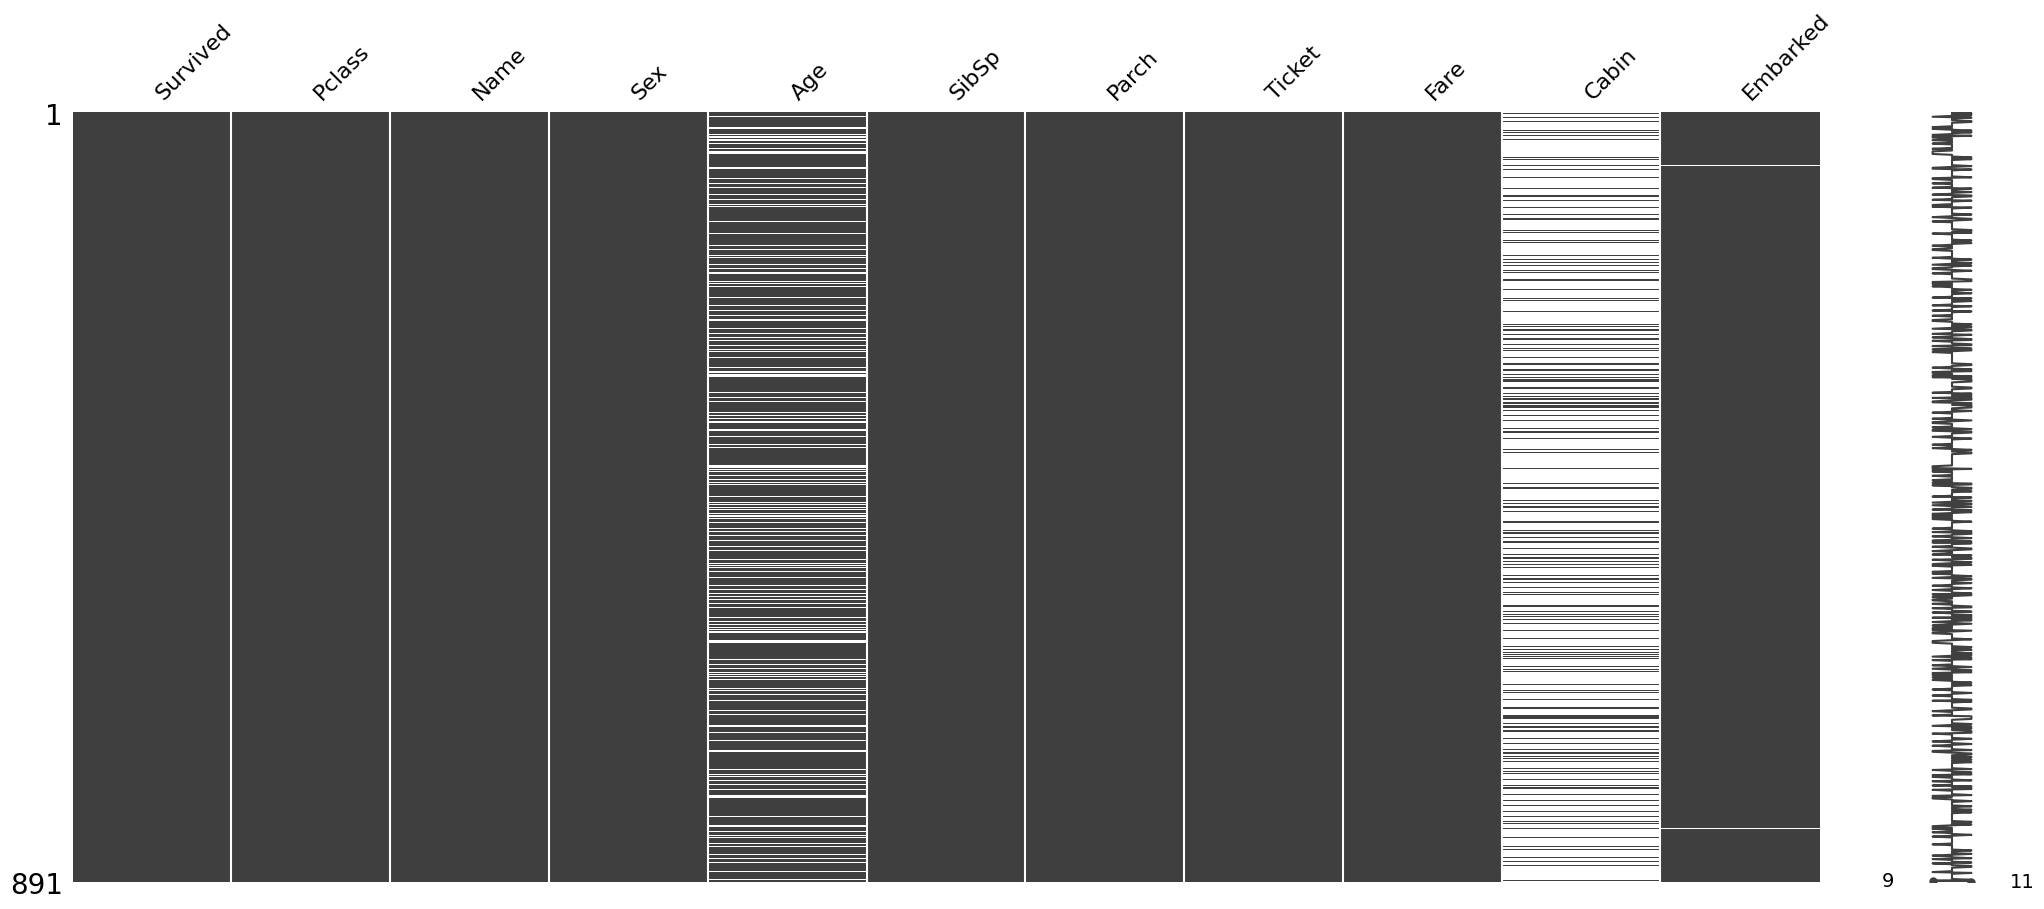

In [9]:
import missingno as msno

# plot the missing values
msno.matrix(df)
plt.show()

In [10]:
# percentage of missing values in each column
missing_values = df.isnull().mean() * 100
print(missing_values)

Survived     0.000000
Pclass       0.000000
Name         0.000000
Sex          0.000000
Age         19.865320
SibSp        0.000000
Parch        0.000000
Ticket       0.000000
Fare         0.000000
Cabin       77.104377
Embarked     0.224467
dtype: float64


## 1-1 Target variable

In [11]:
# count how many survived and how many didn't
class_counts = df['Survived'].value_counts()
class_counts

Survived
0    549
1    342
Name: count, dtype: int64

In [12]:
# calculate the percentage of missing values in each column
class_proportions = class_counts / df.shape[0]
class_proportions = class_proportions.values.tolist()
class_proportions_str = [f'{prop:.2%}' for prop in class_proportions]

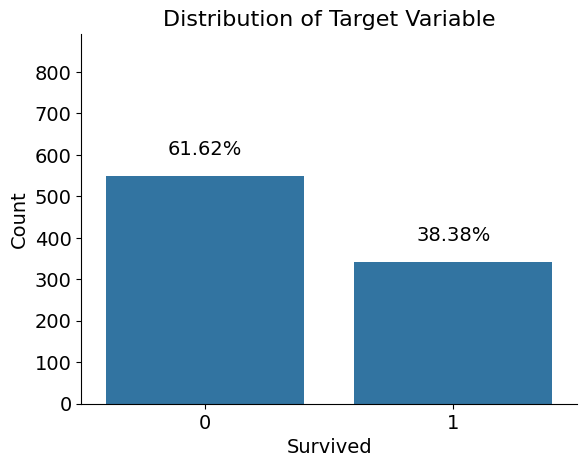

In [13]:
# plot the distribution of the target variable

sns.countplot(x='Survived', data=df)

plt.title('Distribution of Target Variable', fontsize=16)
plt.xlabel('Survived', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.ylim([0, len(df)])
for i, count in enumerate(class_counts):
    plt.text(i, count + 50, class_proportions_str[i], ha='center', fontsize=14, color='black')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
sns.despine()

plt.show()

In [14]:
# Percentage  of women that survived
women = df.loc[df.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)
# print the percentage with two decimal places
print(f"% of women who survived:{rate_women*100:.2f}")

% of women who survived:74.20


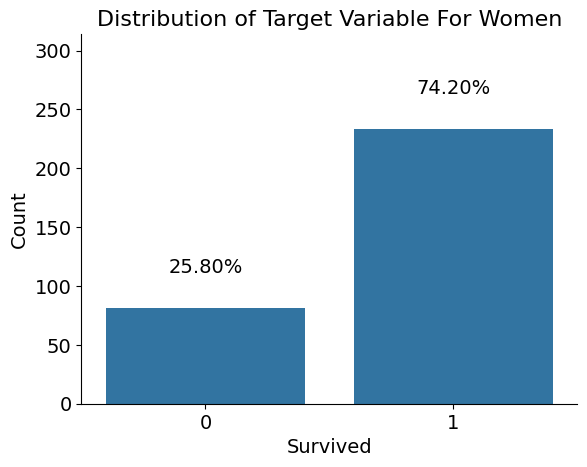

In [15]:
# Percentage of women that survived
women = df.loc[df.Sex == 'female']

women_counts = women['Survived'].value_counts()

women_proportions = women_counts / women.shape[0]
women_proportions = women_proportions.values.tolist()
women_proportions_str = [f'{prop:.2%}' for prop in women_proportions]
women_proportions_str = women_proportions_str[::-1]
sns.countplot(x='Survived', data=women)

plt.title('Distribution of Target Variable For Women', fontsize=16)
plt.xlabel('Survived', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.ylim([0, len(women)])

women_counts = women_counts.iloc[::-1]
for i, count in enumerate(women_counts):
    plt.text(i, count+30, women_proportions_str[i], ha='center', fontsize=14, color='black')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
sns.despine()

plt.show()

In [16]:
# Percentage of men that survived
men = df.loc[df.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print(f"% of men who survived: {rate_men*100:.2f}%")

% of men who survived: 18.89%


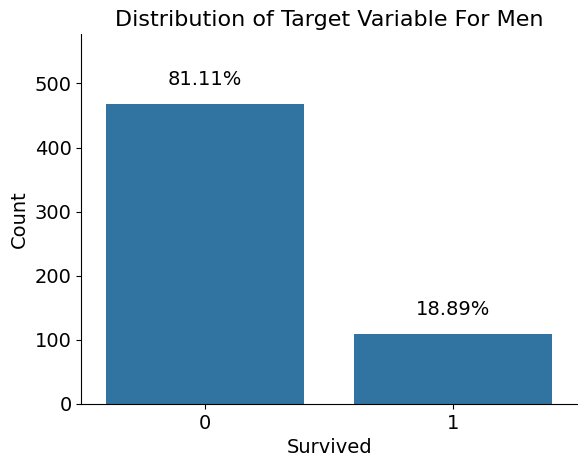

In [17]:
# Percentage of men that survived
men = df.loc[df.Sex == 'male']

men_counts = men['Survived'].value_counts()

men_proportions = men_counts / men.shape[0]
men_proportions = men_proportions.values.tolist()
men_proportions_str = [f'{prop:.2%}' for prop in men_proportions]

sns.countplot(x='Survived', data=men)

plt.title('Distribution of Target Variable For Men', fontsize=16)
plt.xlabel('Survived', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.ylim([0, len(men)])

for i, count in enumerate(men_counts):
    plt.text(i, count+30, men_proportions_str[i], ha='center', fontsize=14, color='black')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
sns.despine()

plt.show()

## 1-2 Numerical features

In [18]:
# extract the numerical columns 

num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print(num_cols)

# remove the "Survived" and "Pclass" columns
# cols to remove 
cols_to_remove = ['Survived', 'Pclass']
for col in cols_to_remove:
    num_cols.remove(col)

['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


In [19]:
# numerical features
df[num_cols].describe()

,Age,SibSp,Parch,Fare
count,714.000000,891.000000,891.000000,891.000000
mean,29.699118,0.523008,0.381594,32.204208
std,14.526497,1.102743,0.806057,49.693429
min,0.420000,0.000000,0.000000,0.000000
25%,20.125000,0.000000,0.000000,7.910400
50%,28.000000,0.000000,0.000000,14.454200
75%,38.000000,1.000000,0.000000,31.000000
max,80.000000,8.000000,6.000000,512.329200


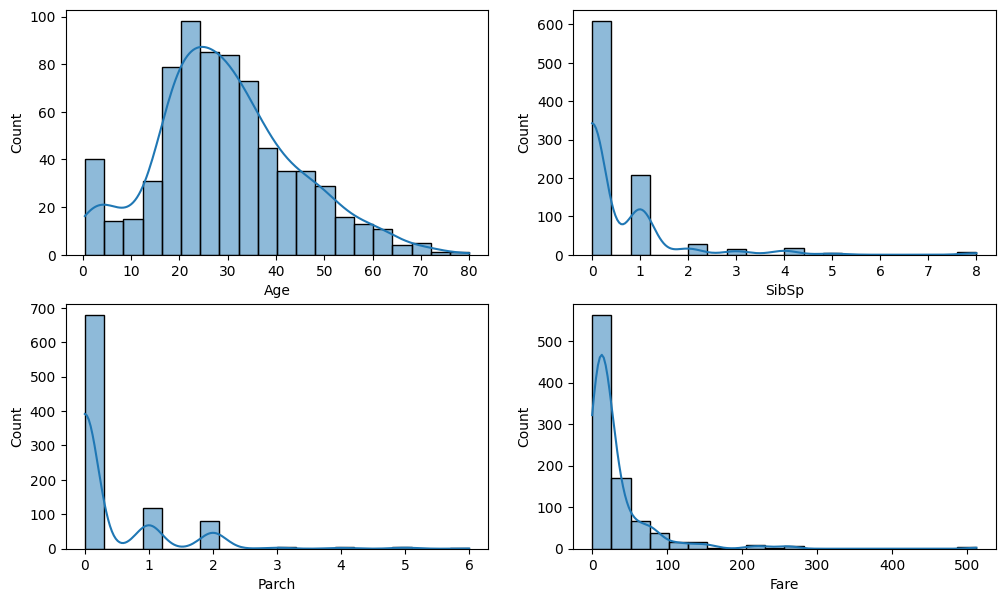

In [20]:
# histogram of numerical features

fig, axs = plt.subplots(2, 2, figsize=(12,7))
for i,col in enumerate(num_cols):
  sns.histplot(df[col],kde=True,ax = axs[i//2,i%2],bins=20)
plt.show()

In [21]:
cols_to_remove = ['Parch', 'SibSp']
for col in cols_to_remove:
    num_cols.remove(col)

### Boxplots 

<center>

<img src="https://i.imgur.com/PS0vh79.png"  alt text="BoxPlot" width=700 height=300>

</center>

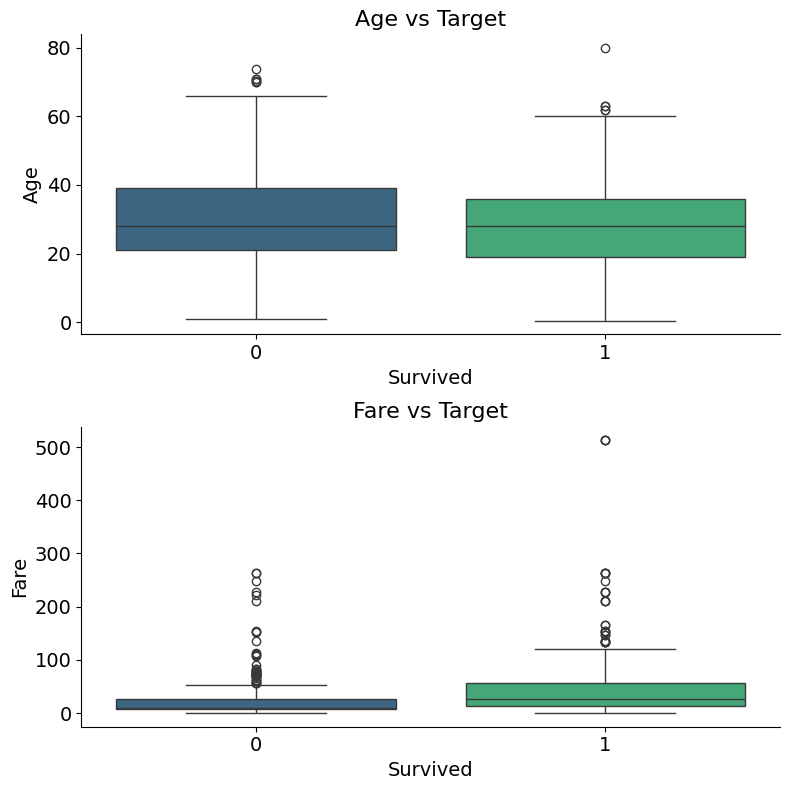

In [22]:
# Create subplots for each continuous feature
fig, axs = plt.subplots(nrows=len(num_cols), figsize=(8, 4 * len(num_cols)))
for i, col in enumerate(num_cols):
    sns.boxplot(x='Survived', y=col, data=df, ax=axs[i], palette='viridis')
    axs[i].set_title(f'{col.title()} vs Target', fontsize=16)
    axs[i].set_xlabel('Survived', fontsize=14)
    axs[i].set_ylabel(col.title(), fontsize=14)
    axs[i].tick_params(axis='both', labelsize=14)
    sns.despine()

# Adjust spacing between subplots
fig.tight_layout()

# Display the plot
plt.show()

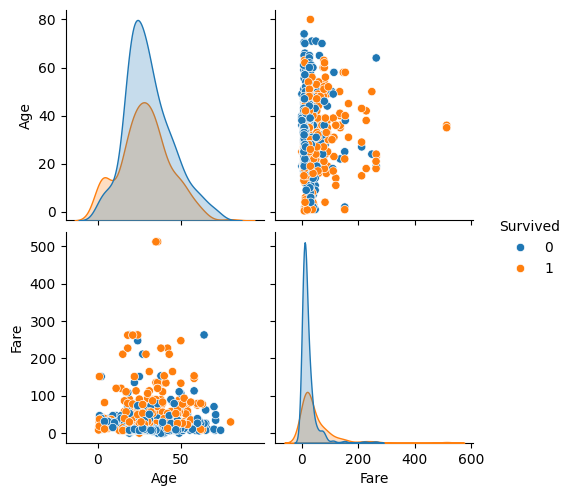

In [23]:
sns.pairplot(data=df, vars=num_cols, hue='Survived')
plt.show()

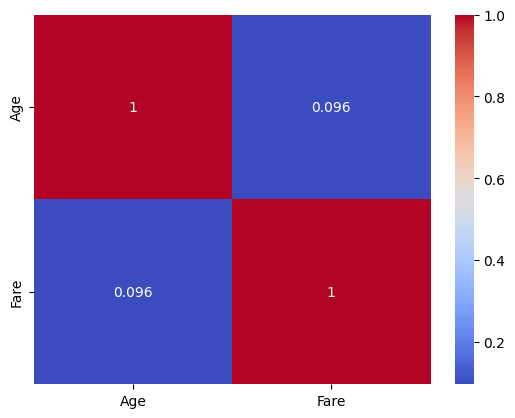

In [24]:
# Correlation matrix
correlation_matrix = df[num_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

## Categorical featured

In [25]:
# extract the categorical columns where the number of unique values is less than 50
cat_features=[f for f in df.columns if f not in ["PassengerId","Name","Survived"] and df[f].nunique()<50]
cat_features

['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']

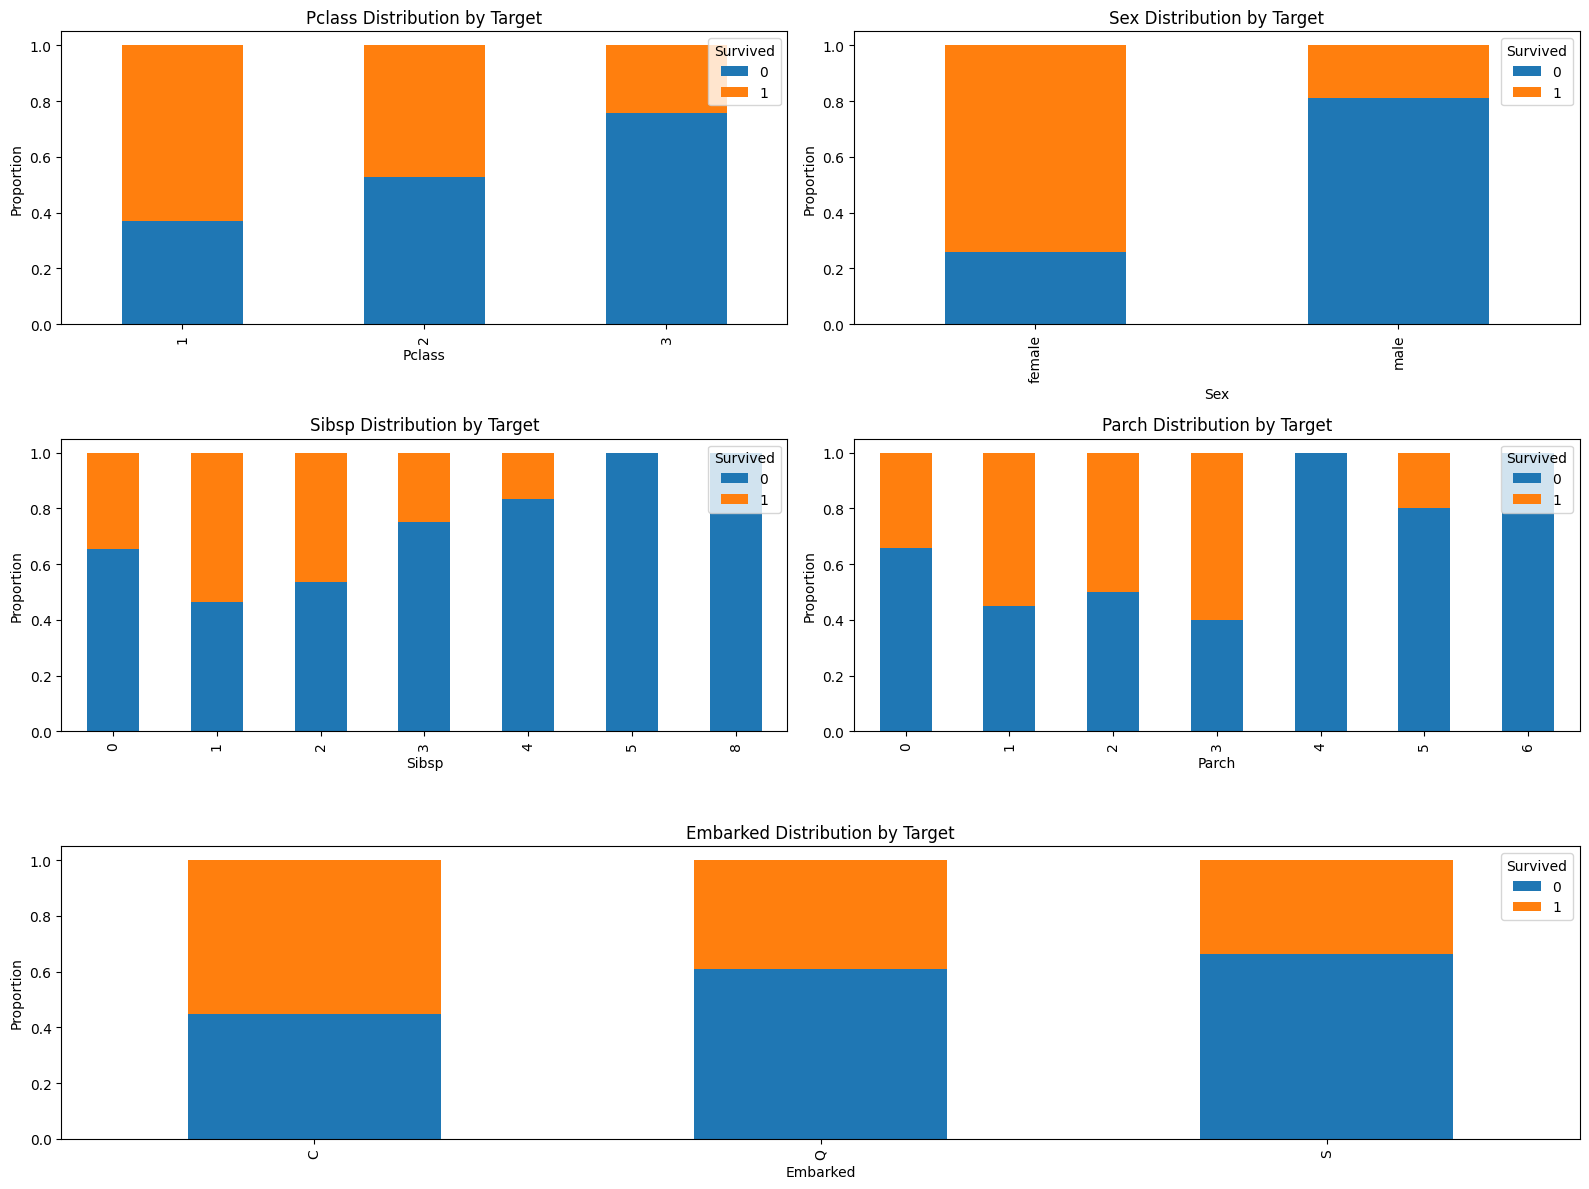

In [26]:
# Create a grid of subplots with 3 rows and 2 columns
fig = plt.figure(figsize=(16, 12))

# Create subplots for the first 4 categorical features
axs = [plt.subplot2grid((3, 2), (i//2, i%2)) for i in range(4)]

# Create a subplot for the last categorical feature that spans both columns of the third row
axs.append(plt.subplot2grid((3, 2), (2, 0), colspan=2))

# Loop through each categorical feature and plot the contingency table in a subplot
for i, col in enumerate(cat_features):
    contingency_table = pd.crosstab(df[col], df['Survived'], normalize='index')
    contingency_table.plot(kind='bar', stacked=True, ax=axs[i])
    axs[i].set_title(f"{col.title()} Distribution by Target")
    axs[i].set_xlabel(col.title())
    axs[i].set_ylabel("Proportion")

# Adjust spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()

### Name

In [27]:
# print the first 5 rows of the 'Name' column
df['Name'].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [28]:
# drop the 'Name' column
df.drop('Name', axis=1, inplace=True)

# Data cleaning

## Imputing missing values

### Age

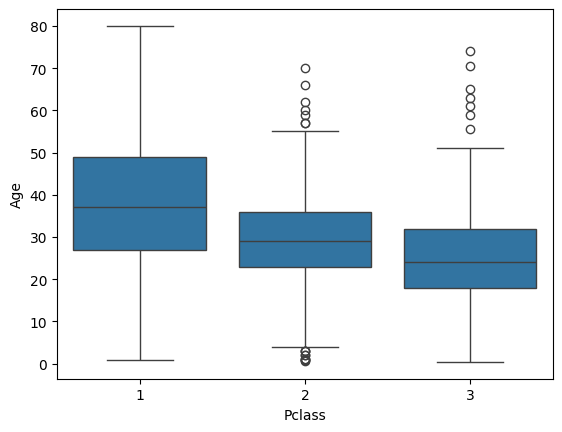

In [29]:
# we start by checking the age for different social classes
sns.boxplot(x='Pclass', y='Age', data=df)
plt.show()

In [30]:
# we calculate the median age for each social class
age_by_pclass = df.groupby('Pclass')['Age'].mean()
age_by_pclass

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [31]:
# now we impute for each class
for pclass, age in age_by_pclass.items():
    df.loc[(df['Age'].isnull()) & (df['Pclass'] == pclass), 'Age'] = age

In [32]:
# number of missing values in the Age columns after imputation
df['Age'].isnull().sum()

0

### Cabin

In [33]:
# print the first 5 rows of the 'Cabin' column
df['Cabin'].head()

0     NaN
1     C85
2     NaN
3    C123
4     NaN
Name: Cabin, dtype: object

In [34]:
# drop the 'Cabin' column
df.drop('Cabin',axis=1, inplace=True)

### Ticket

In [35]:
# print the first 5 rows of the 'Ticket' column
df['Ticket'].head()

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
Name: Ticket, dtype: object

In [36]:
df.drop('Ticket', axis=1, inplace=True)

## Removing Outliers

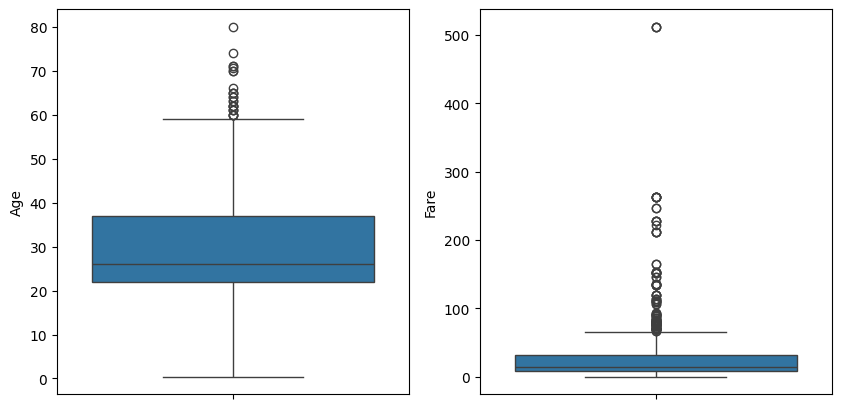

In [37]:
# checking for outliers Age and Fare
fig, axs = plt.subplots(1, 2, figsize=(10,5))
sns.boxplot(y='Age', data=df, ax=axs[0])
sns.boxplot(y='Fare', data=df, ax=axs[1])
plt.show()

Equations for calculating upper and lower bounds

$Q_1 =$ is the first quantile (25th percentile),

$Q_3 =$ is the third quantile  (75th percentile)

$IQR = Q_3 - Q_1 $

$Lower Bound = Q_1 - (1.5 * IQR)$

$Upper Bound = Q_3 + (1.5 * IQR)$

In [38]:
def remove_outliers(df, columns, factor=1.5):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - factor * IQR
        upper_bound = Q3 + factor * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# Apply the function to remove outliers from numeric columns
df = remove_outliers(df, ['Fare'])

#print the new shape of the data
print(df.shape)

(775, 8)


### Onehotencoding

In [39]:
# Onehotencode "Sex" and "Embarked" columns
# Create dummy variables and dont add prefix
df = pd.get_dummies(df,columns=['Sex','Embarked'],drop_first=True,dtype=int)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 775 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    775 non-null    int64  
 1   Pclass      775 non-null    int64  
 2   Age         775 non-null    float64
 3   SibSp       775 non-null    int64  
 4   Parch       775 non-null    int64  
 5   Fare        775 non-null    float64
 6   Sex_male    775 non-null    int32  
 7   Embarked_Q  775 non-null    int32  
 8   Embarked_S  775 non-null    int32  
dtypes: float64(2), int32(3), int64(4)
memory usage: 51.5 KB


In [41]:
# rename the column sex_male to Sex
df.rename(columns={'Sex_male': 'Sex'},inplace=True)

### Splitting the data

In [42]:
y = df['Survived'].values
X = df.drop('Survived', axis=1)

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED,stratify=y)

### Scaling the numerical features

In [44]:
# scale the numerical columns
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
cols_to_transform = ['Age', 'Fare']
X_train[cols_to_transform] = scaler.fit_transform(X_train[cols_to_transform])
X_test[cols_to_transform] = scaler.transform(X_test[cols_to_transform])

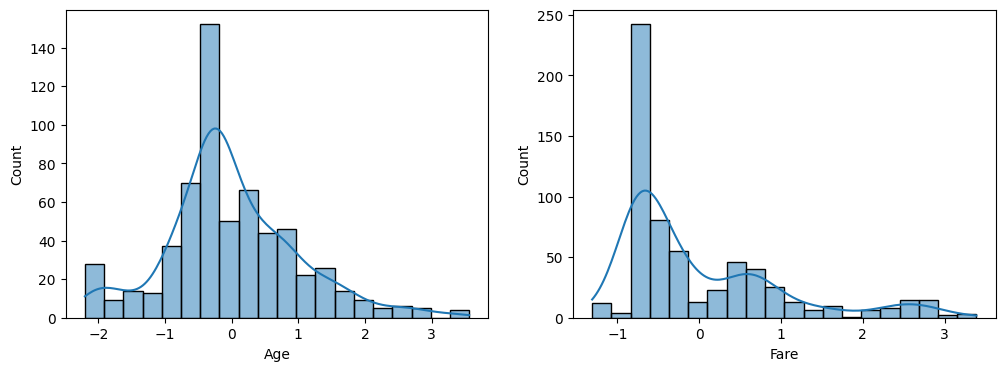

In [45]:
fig, axs = plt.subplots(1, 2, figsize=(12,4))

for i,col in enumerate(cols_to_transform):
  sns.histplot(X_train[col],kde=True,ax = axs[i%2],bins=20)
plt.show()

# Building the model

## Logistic Regression

### Logistic Regression Equation:
<center>

$p(x) = \frac{1}{1+e^{\beta_0+\beta_1x}}$

</center>

<center>

<img src="https://i.imgur.com/OfvkEKW.png" alt="logistic_regression_function" width="700" height="400">

</center>


In [46]:
from sklearn.linear_model import LogisticRegression

# Create a Logistic Regression model
logistic_model = LogisticRegression(random_state=SEED)
logistic_model.fit(X_train, y_train)

LogisticRegression(random_state=9)

In [47]:
# evaluate the model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Predict the labels of the test set
y_pred_logistic = logistic_model.predict(X_test)

print(f"The accuracy is: {accuracy_score(y_test, y_pred_logistic):.2f}")

The accuracy is: 0.79


### Confusion Matrix

A confusion matrix is a table that is often used to evaluate the performance of a classification model. It summarizes the predictions of a model on a classification problem and compares them to the true outcomes. The matrix is typically organized into rows and columns, where each row represents the actual class labels, and each column represents the predicted class labels.

Here's a breakdown of the elements in a confusion matrix:

- **True Positive (TP)**: The number of instances that were correctly predicted as positive (class 1).
- **False Positive (FP)**: The number of instances that were incorrectly predicted as positive (class 1) when they were actually negative (class 0). Also known as Type I error.
- **True Negative (TN)**: The number of instances that were correctly predicted as negative (class 0).
- **False Negative (FN)**: The number of instances that were incorrectly predicted as negative (class 0) when they were actually positive (class 1). Also known as Type II error.

The confusion matrix provides valuable insights into the performance of the model, including its accuracy, precision, recall, and other evaluation metrics. It is especially useful for evaluating the performance of models in binary classification tasks but can be extended to multiclass classification problems as well.

<center>
<img src="https://i.imgur.com/1j3bJur.png" alt="Confusion Matrix" width="500" height="300">
</center>

In [48]:
print("The confusion matrix for the logistic model is: ")
print(confusion_matrix(y_test, y_pred_logistic))

The confusion matrix for the logistic model is: 
[[90 12]
 [21 32]]


### Evaluation Metrics

- The accuracy of the positive predictions (Precision):

- Precision measures the proportion of positive predictions made by the model that are actually correct.
- It quantifies the accuracy of the model in predicting positive instances.
- Precision is calculated as the ratio of true positives (TP) to the sum of true positives and false positives (FP):


<center>

$Precision = \frac{TP}{TP + FP}$

</center>


- The true positive rate (Recall):

- Recall, also known as sensitivity or true positive rate, measures the proportion of actual positive instances (class 1) that are correctly predicted by the model.
- It quantifies the ability of the model to identify all relevant instances of the positive class.
Recall is calculated as the ratio of true positives (TP) to the sum of true positives and false negatives (FN):


<center>

$Recall = \frac{TP}{TP + FN}$

</center>


- $F_1$ Score:

- The F1 score is the harmonic mean of precision and recall. It provides a balance between precision and recall, considering both false positives and false negatives.

- F1 score is useful when there is an uneven class distribution or when false positives and false negatives have different costs.

- F1 score is calculated as follows:


<center>

$F_1 = \frac{2}{\frac{1}{precision}+\frac{1}{recall}}$

</center>

In [49]:
print("The classification report for the logistic model is: ")
print(classification_report(y_test, y_pred_logistic))

The classification report for the logistic model is: 
              precision    recall  f1-score   support

           0       0.81      0.88      0.85       102
           1       0.73      0.60      0.66        53

    accuracy                           0.79       155
   macro avg       0.77      0.74      0.75       155
weighted avg       0.78      0.79      0.78       155



### Decision Tree

<center>

<img src="https://i.imgur.com/Ohdygrq.png" alt text="Decision Tree" width=400 height=400>

</center>

In [50]:
from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree model
tree_model = DecisionTreeClassifier(random_state = SEED)
tree_model.fit(X_train, y_train)

# Predict the labels of the test set
y_pred_tree = tree_model.predict(X_test)

In [51]:
# evaluate the model
print(f"The accuracy is: {accuracy_score(y_test, y_pred_tree):.2f}")
print(classification_report(y_test, y_pred_tree))

The accuracy is: 0.81
              precision    recall  f1-score   support

           0       0.86      0.84      0.85       102
           1       0.71      0.74      0.72        53

    accuracy                           0.81       155
   macro avg       0.78      0.79      0.79       155
weighted avg       0.81      0.81      0.81       155



### Decision Forest

In [52]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest model
forest_model = RandomForestClassifier(random_state = SEED)
forest_model.fit(X_train, y_train)

y_pred_rf = forest_model.predict(X_test)

In [53]:
print(f"The accuracy is: {accuracy_score(y_test, y_pred_rf):.2f}")
print(classification_report(y_test, y_pred_rf))

The accuracy is: 0.83
              precision    recall  f1-score   support

           0       0.87      0.88      0.87       102
           1       0.76      0.74      0.75        53

    accuracy                           0.83       155
   macro avg       0.82      0.81      0.81       155
weighted avg       0.83      0.83      0.83       155



### XGBoost

In [54]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective='binary:logistic', random_state = SEED)
xgb_model.fit(X_train, y_train)

# Predict the labels of the test set
y_pred_xgb = xgb_model.predict(X_test)

In [55]:
# evaluate the model
print(f"The accuracy is: {accuracy_score(y_test, y_pred_xgb):.2f}")
print(classification_report(y_test, y_pred_xgb))

The accuracy is: 0.85
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       102
           1       0.77      0.77      0.77        53

    accuracy                           0.85       155
   macro avg       0.83      0.83      0.83       155
weighted avg       0.85      0.85      0.85       155



## Finetuning

In [56]:
from sklearn.model_selection import GridSearchCV

# Create the parameter grid
param_grid = {
    'max_depth': [3, 4, 5, 6],
    'learning_rate': [0.1, 0.01, 0.05],
    'n_estimators': [50, 100, 150,180, 200]
}

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid,
                          cv=3, n_jobs=1, verbose=1)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 60 candidates, totalling 180 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=9, ...),
             n_jobs=1,
             param_grid={'learning_rate': [0.1, 0.01, 0.05],
                         'max_depth': [3, 4, 5, 6],
                         'n_estimators': [50, 100, 150, 180, 200]},
             verbose=1)

In [57]:
# grid search best parameters
grid_search.best_params_

{'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 150}

In [58]:
# grid search best estimator
best_xgb_model = grid_search.best_estimator_

In [59]:
# Predict the labels of the test set
y_pred_best_xgb = best_xgb_model.predict(X_test)
print(f"The accuracy is: {accuracy_score(y_test, y_pred_best_xgb):.2f}")
print(classification_report(y_test, y_pred_best_xgb))

The accuracy is: 0.82
              precision    recall  f1-score   support

           0       0.85      0.88      0.87       102
           1       0.76      0.70      0.73        53

    accuracy                           0.82       155
   macro avg       0.80      0.79      0.80       155
weighted avg       0.82      0.82      0.82       155



In [60]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

# Create the parameter grid
param_dist = {
    'max_depth': randint(3, 10),
    'learning_rate': uniform(0.01, 0.1),
    'n_estimators': randint(50, 200)
}

# Instantiate the RandomizedSearchCV model
random_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_dist,
                                   n_iter=100, cv=5, n_jobs=1, verbose=1,random_state = SEED)

random_search.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                   n_iter=100, n_jobs=1,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000002AFBDB0A9D0>,
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002AFBAA16310>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002AFBA965A50>},
                   random_state=9, verbose=1)

In [61]:
#extract the best hyper-parameters
random_search.best_params_

{'learning_rate': 0.017074288067705248, 'max_depth': 8, 'n_estimators': 142}

In [62]:
#extract the best model
best_xgb = random_search.best_estimator_

In [63]:
# evaluate the best model
y_pred_best = best_xgb.predict(X_test)
print(f"The accuracy is: {accuracy_score(y_test, y_pred_best):.2f}")
print(classification_report(y_test, y_pred_best))

The accuracy is: 0.83
              precision    recall  f1-score   support

           0       0.86      0.89      0.88       102
           1       0.78      0.72      0.75        53

    accuracy                           0.83       155
   macro avg       0.82      0.80      0.81       155
weighted avg       0.83      0.83      0.83       155



## Validating the models

## Underfitting and Overfitting

### 1. Underfitting:

- Underfitting occurs when a model is too simple to capture the underlying structure of the data.
- It often occurs when the model is not complex enough to learn the patterns present in the training data.
- An underfit model performs poorly not only on the training data but also on unseen or test data.
- Solutions to underfitting include using a more complex model, increasing the number of features, or reducing regularization.

### 2. Overfitting:

- Overfitting occurs when a model learns the training data too well, capturing noise and outliers rather than the underlying patterns.
- It often occurs when the model is too complex relative to the amount of training data available.
- An overfit model performs well on the training data but generalizes poorly to unseen or test data.
- Solutions to overfitting include using simpler models, reducing the number of features, increasing the amount of training data, or applying regularization techniques such as L1/L2 regularization or dropout.

<center>
<img src="https://i.imgur.com/kntP3Em.png" alt="fitting" width="700" height="300">
</center>

In [64]:
# first trained model (default hyper-parameters)
train_accuracy = accuracy_score(y_train, xgb_model.predict(X_train))
test_accuracy = accuracy_score(y_test, y_pred_xgb)
print(f"Train accuracy: {train_accuracy:.2f}, Test accuracy: {test_accuracy:.2f}")

Train accuracy: 0.96, Test accuracy: 0.85


In [65]:
# best model from random search
train_accuracy = accuracy_score(y_train, best_xgb.predict(X_train))
test_accuracy = accuracy_score(y_test, y_pred_best_xgb)
print(f"Train accuracy: {train_accuracy:.2f}, Test accuracy: {test_accuracy:.2f}")

Train accuracy: 0.89, Test accuracy: 0.82


### Cross-validation

<img src="https://i.imgur.com/59uIQeT.png" >

In [66]:
# starified kfold cross validation for xgb model
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=SEED)
xgb_accuracies = []
for train_index, test_index in skf.split(X_train, y_train):
    X_train_fold, X_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_fold, y_test_fold = y_train[train_index], y_train[test_index]
    best_xgb.fit(X_train_fold, y_train_fold)
    y_pred = best_xgb.predict(X_test_fold)
    xgb_accuracies.append(accuracy_score(y_test_fold, y_pred))

In [67]:
pd.Series(xgb_accuracies).describe()

count    10.000000
mean      0.840323
std       0.024579
min       0.806452
25%       0.826613
50%       0.838710
75%       0.854839
max       0.887097
dtype: float64

# Feature Importance

In [68]:
# extract the feature importance
feature_importance = best_xgb.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

In [69]:
feature_importance_df

,Feature,Importance
5,Sex,0.729218
0,Pclass,0.108830
3,Parch,0.043186
1,Age,0.032103
2,SibSp,0.031250
4,Fare,0.026317
7,Embarked_S,0.020065
6,Embarked_Q,0.009031


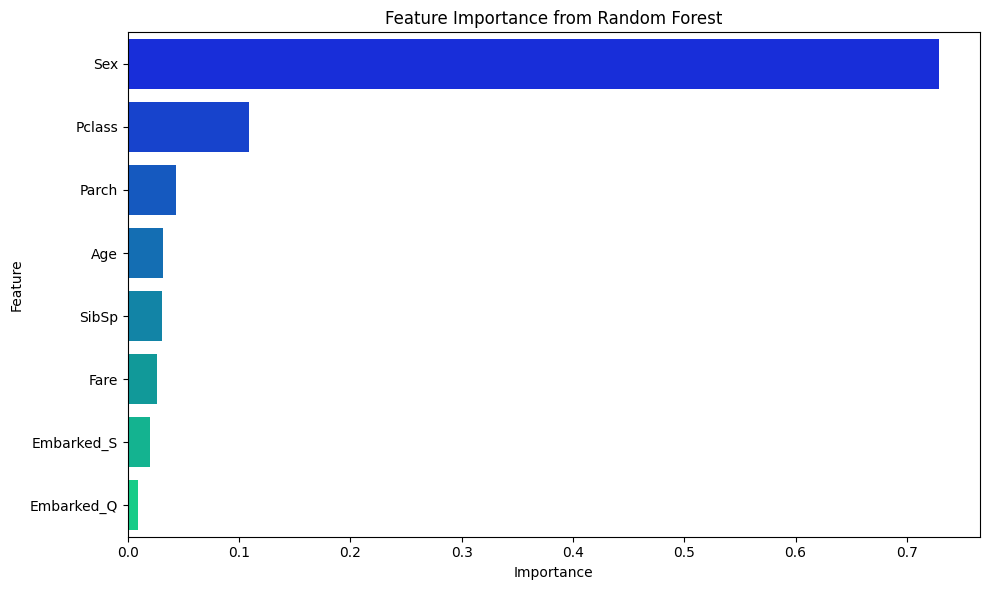

In [70]:
# plot the feature importance and the values on the plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df,palette='winter', saturation=0.8)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from Random Forest')
plt.tight_layout()
plt.show()